In [2]:
import pandas as pd
import numpy as np
from random import randint
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import math
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

Make Random dataset.

Source: http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html

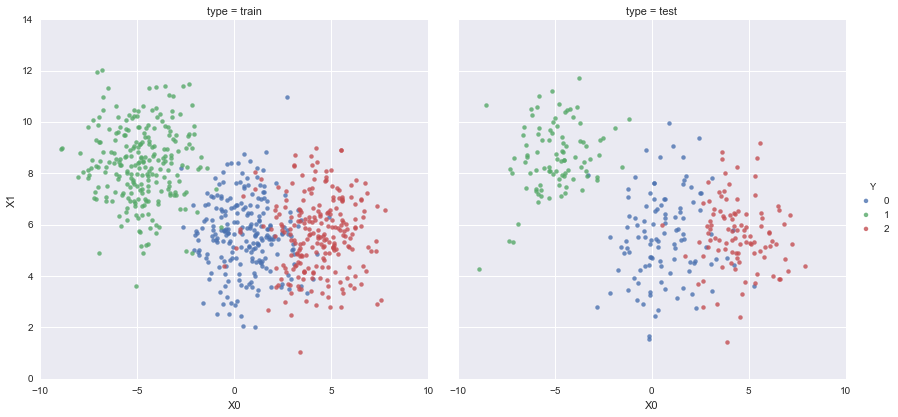

In [144]:
from sklearn.datasets import make_blobs

df = pd.DataFrame(columns=['X0','X1','Y'])
X, Y = make_blobs(n_samples=1000, n_features=2, centers=3, cluster_std=1.5)
train_test_split = 0.7
train_size = int(X.shape[0]*train_test_split) 
test_size = X.shape[0] - train_size
X_train,Y_train,X_test,Y_test = X[0:train_size],Y[0:train_size],X[train_size:],Y[train_size:] 
df['X0'],df['X1'],df['Y'] = X[:, 0],X[:, 1],Y
df['type'] = 'train'
df.loc[train_size:,'type'] = 'test'

#plt.title("four clusters", fontsize='small')
#plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)
sns.lmplot(x='X0',y='X1',data=df,hue='Y',fit_reg=False, col='type', size=6)

## K-Nearest Neighbour

[K-nearest neighbour](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) algorithm,  is a *supervised* classification or regression of data. This is **NOT** to be confused with  [K-means clustering](https://en.wikipedia.org/wiki/K-means_clustering), which is an algorithm for *unsupervised* clustering (grouping) of data. 

The concept is as follows:
1. define the "distance" function so that we know how far apart each data point is from one another, for example: a real-life distance on a 2D map.
2. choose "K" neighbours. this will be used for voting later.
3. for each "test/new" data point (those that we need to classify), calculate its distance to all the data points in the "train/reference" dataset. 
4. for each "test/new" data point, rank the "reference" data points by its distance.
5. select K closest "reference" data points.
6. by majority voting, we use the most common class in the "reference" group as our prediction for that particular "test" data point.


### Distance function

Since our data is 2-dimension on a cartesian coordinate, we are just going to use euclidean distance. This can be generalized to N dimension as well. The square root doesn't matter so I leave it out.

Caveat: all features (aka input variables) should be standardized so they all have the same scale.

$$ D_{i,K} = (X0_i-C0_K)^2+(X1_i-C1_K)^2$$


### Code starts here

...

..

.

In [145]:
#step 1 - define distance function
def distance(X,C):
    return np.sum((X-C)**2,axis=1)

In [148]:
#step 2 - init settings
K = 5
feature_size = 2
np.set_printoptions(suppress=True)

#mini-step - initialize prev_label
prev_label = np.zeros(shape=(X.shape[0]))
same_flag = False
run_count = 0

In [149]:
#step 3 - calculate distance
# for K centroids, data point no. i-th
dist = np.zeros(shape=(test_size,train_size))
for i in range(0,test_size):
    dist[i] = distance(X_test[i],X_train)

#step 4 - rank distance
rank = np.argsort(dist.argsort(axis=1),axis=1)

#step 5 - select K closest and fill in as prediction (label)
rank_masked = (rank <= K)*(Y_train.T + 1) #add 1 to offset the mask's zero

label = np.zeros(shape=Y_test.shape)
for i in range(0,test_size):
    rank_nonzero = rank_masked[i,np.nonzero(rank_masked[i])]
    (values,counts) = np.unique(rank_nonzero,return_counts=True)
    ind=np.argmax(counts)
    label[i] = values[ind]-1 #offset it back

Test set Accuracy = 91.00%


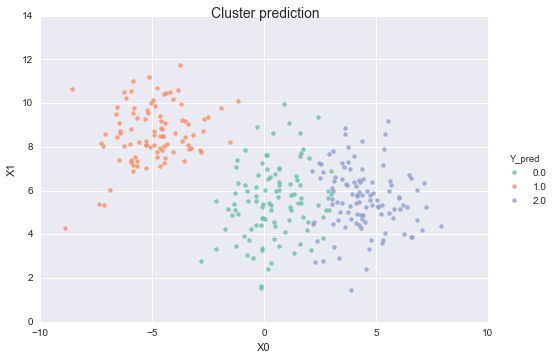

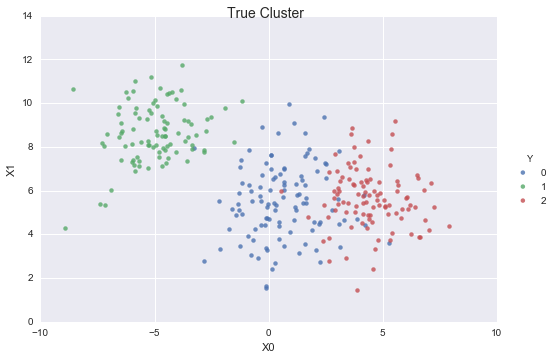

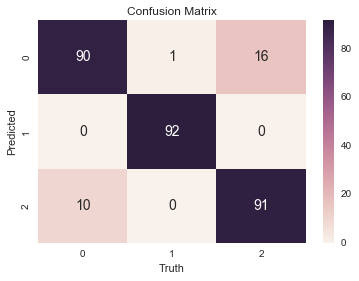

In [154]:
#plot clustering
df_test = df[df.type == 'test'].copy()
df_test.loc[:,'Y_pred'] = label
g = sns.lmplot(x='X0',y='X1',data=df_test, hue='Y_pred',fit_reg=False, size=6, palette="Set2")
g.fig.suptitle('Cluster prediction')
g.fig.set_size_inches(8,5)
g = sns.lmplot(x='X0',y='X1',data=df_test, hue='Y',fit_reg=False, size=6)
g.fig.suptitle('True Cluster')
g.fig.set_size_inches(8,5)

#print cm_matrix
from sklearn.metrics import confusion_matrix
def show_confusion_matrix(cm_mat):
    accuracy = np.trace(cm_mat)*100.0/test_size
    print 'Test set Accuracy = {:.2f}%'.format(accuracy)
    df_cm = pd.DataFrame(cm_mat)
    plt.figure(figsize = (6,4),dpi=300)
    sns.heatmap(df_cm, cbar=True ,annot=True, fmt=',.0f')
    plt.title('Confusion Matrix')
    plt.xlabel('Truth')
    plt.ylabel('Predicted')
    
cm_mat = confusion_matrix(df_test['Y'],df_test['Y_pred'])
show_confusion_matrix(cm_mat)